# Table of Contents

>[Understanding and working with Data using Python Tools Numpy and Pandas](#scrollTo=1IaEVuk_QZ9A)

>[Special handling of Vectors](#scrollTo=1IaEVuk_QZ9A)

>[What is NumPy? Ways of creating NumPy Array](#scrollTo=3sAVEsqZa9v3)

>[Important attributes of a NumPy object](#scrollTo=2bzZ1832f7uo)

>[Special Features of NumPy Array](#scrollTo=lJ9PF2Jyl69t)

>[What is Pandas and why to use it?](#scrollTo=udlL24ocrbeJ)

>[Simple Data Wrangling using Pandas](#scrollTo=GfoLajxX3mMe)

>[Indexing rows](#scrollTo=LT-9OuT0Etql)

>[Types of Data](#scrollTo=QmjBeB79Wmso)

>[Describing your data](#scrollTo=QmjBeB79Wmso)

>[Data Visualization with matplotlib](#scrollTo=g3nxE5jgJ6Im)

>[References](#scrollTo=joWpjZ8naJJ3)



# Understanding and working with Data using Python Tools Numpy and Pandas

Python has become one of the standard languages for Machine Learning Applications. As we know that data is usually stored in tabular format and a table is akin to a matrix with rows and columns. 

Consider a data that records petal width and length of two varieties of iris flower: versicolor and virginica. Each column is also called a dimension. Below is a scatter plot:

![alt text](https://i2.wp.com/scienceprog.com/wp-content/uploads/2017/01/iris_data_plot_with_boundary.png?fit=387%2C271&ssl=1)

The blue line clearly indicates a separation boundary that separates the two varieties. Now given a petal width and length based on which side the point lie to that line, we can predict what variety it is.

In this case we had each flowers represented as a 2-vector [length, width]. And we found a separating boundly using some linear algebra calculations that work on the matrix formed by all rows of the data provided.

We could also have 3 dimensions, say we also bring in sepal width, The separation may now look like:

![alt text](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png)

This can even be extended to 4 or more dimensions (not easy to visualize)

For example say we want to classify a video as one of 3 categories (good, spam, clickbait) based on what we know about it. We recorded 4 features for each video: duration, % viewers that watched it beyond 1 minute, number of views per day, number of times it was flagged as spam. So now we can represent each video as a vector e.g. [10.5, 5.2, 3.25, 7.0] represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam.

As you can see, each axis may have a different meaning. Based on this vector, our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector: class_probabilities = [0.8,0.18,0.02].

# Special handling of Vectors

As can be observed, vectors can be used in Machine Learning to define observations and predictions. Therefore, Matrix and vector manipulations are extremely important for scientific computations. Both [NumPy](http://www.numpy.org/) and [Pandas](https://pandas.pydata.org/) have emerged to be essential libraries for any scientific computation, including machine learning, in python due to their intuitive syntax and high-performance matrix computation capabilities.

Suppose I want to multiply two arrays (vectors) element-wise of size 3: [1, 2, 3] and [4, 5, 6]. I will have to do three multiplication operations in a loop resulting in [4, 10, 18], i.e. However in modern processors we can use SIMD speed optimization that applies same isntruction (in this case multiply) to multiple data elemets simultaneously (on each parallel processor either in CPU or GPU). For example with a computer with 4 parallel threads, following is possible:

![Multiplication vectorized and not vectorized](https://datascience.blog.wzb.eu/wp-content/uploads/10/2018/02/vectorization-300x276.png)

In Python we can multiply two sequences with a [list comprehension](http://www.pythonforbeginners.com/basics/list-comprehensions-in-python):


In [1]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
[x * y for x, y in zip(a, b)]

[6, 14, 24, 36, 50]

This is fine for smaller data. However, it is not as efficient as vectorizing the multiplication with [NumPy](http://www.numpy.org/). When we put the data into NumPy arrays, we can write the multiplication as follows:

In [0]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
a * b
array([ 6, 14, 24, 36, 50])

First of all, that’s much more compact than writing a list comprehension. Furthermore, it’s also much faster due to vectorization, as we can see when we multiply two arrays with 1,000,000 integers each. Let’s start with the unoptimized, pure Python implementation using random integers. We use [random](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) module in Python to generate random numbers. And the [%timeit](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) “magic command” in an IPython session measures the execution time. Below execution took 100ms for me.

In [3]:
import random
a = [random.randint(1, 100) for _ in range(1000000)]
b = [random.randint(1, 100) for _ in range(1000000)]
%timeit res = [x * y for x, y in zip(a, b)]

10 loops, best of 3: 99.9 ms per loop


Now let us see vectorized implementation with NumPy. First of all, Numpy has a built in random generator. and implementation is also simple  and natural rather than using a list comprehension. It took only 3.22 ms. A 30X speedup.

In [4]:
import numpy as np
a = np.random.randint(1, 100, 1000000)
b = np.random.randint(1, 100, 1000000)
%timeit a * b

100 loops, best of 3: 3.22 ms per loop


# What is NumPy? Ways of creating NumPy Array
NumPy stands for ‘Numerical Python’ or ‘Numeric Python’. It is an open source module of Python which provides fast mathematical computation on arrays and matrices. Since, arrays and matrices are an essential part of the Machine Learning ecosystem, NumPy along with Machine Learning modules like Scikit-learn, Pandas, Matplotlib, TensorFlow, etc. complete the Python Machine Learning Ecosystem.

As we saw earlier, in a tabular data the columns have same datatype. Regular Python lists are hetrogeneous. A Numpy arry on the other hand shares same data type for its elements. Below code describes how to import numpy and several ways to create numpy arrays.

In [20]:
import numpy as np
a = np.array([1, 2, 3]) # convert list to array
type(a)

a = np.zeros((2, 3)) # create matrix of all zeros
print("\nzeros: create a 2x3 matrix of all zeros", a, sep="\n")

a = np.ones((3,4), dtype=np.int16) # create a 3x4 matrix of all 1s
print("\nones: create matrix of all 1s", a, sep="\n") # note the dtype attribute, you can try others

a = np.full((3,4), 0.5) # create a 3x4 matrix where each element is 0.5
print("\nfull: fill matrix with given value", a, sep="\n")

a = np.arange(10, 30, 5) # create a numpy array from range(10, 20, 5)
print("\narange int: create array from range object", a, sep="\n")

a = np.arange(1, 3, 0.3) # arange can take floating point arguments
print("\narange (float): special range with floating increments", a, sep="\n") # whereas pyhton range can't

a = np.linspace(0, 3, 6) # fill the range from 0 to 3 by 6 equidistant values. 
print("\nlinspace: fill a range with fixed number of equally spaced values", a, sep="\n") # linspace: linear space

a = np.random.rand(2, 3) # create a 2x3 matrix with random values. 
print("\nrandom: fill a matrix with random values", a, sep="\n") #rand returns values between 0 and 1

a = np.empty((2,3)) #create a 2x3 matrix that is empty. Note that the values 
print("\nempty: create empty matrix, values shown are garbage", a, sep="\n") # filled are simple garbage



zeros: create a 2x3 matrix of all zeros
[[0. 0. 0.]
 [0. 0. 0.]]

ones: create matrix of all 1s
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

full: fill matrix with given value
[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]

arange int: create array from range object
[10 15 20 25]

arange (float): special range with floating increments
[1.  1.3 1.6 1.9 2.2 2.5 2.8]

linspace: fill a range with fixed number of equally spaced values
[0.  0.6 1.2 1.8 2.4 3. ]

random: fill a matrix with random values
[[0.06259686 0.5104424  0.10248071]
 [0.88355637 0.18179414 0.05447936]]

empty: create empty matrix, values shown are garbage
[[0.06259686 0.5104424  0.10248071]
 [0.88355637 0.18179414 0.05447936]]


# Important attributes of a NumPy object

**NDim**: Display the number of dimensions of the array. Note that you can have more than 2 dimensions also

In [25]:
a = np.zeros((2, 3, 4))
print(a)

print("number of dimensions = ", a.ndim)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
number of dimensions =  3


**Shape**: returns a tuple of integers indicating the size of the array

In [26]:
a.shape

(2, 3, 4)

**Size**: returns the total number of elements in the NumPy array

In [27]:
a.size # returns 24 i.e. 2x3x4

24

**Dtype**: returns the type of elements in the array, i.e., int64, character

In [28]:
a.dtype

dtype('float64')

**Itemsize**: returns the size in bytes of each item

In [29]:
a.itemsize

8

**Reshape**: Reshapes the NumPy array, i.e. you can rearrange the elements in new set of dimensions. Below we changethe 2x3x4 array to 8x3 array

In [30]:
a.reshape(8,3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# Special Features of NumPy Array

Some ways in which NumPy arrays are different from normal Python arrays are:

1. If you assign a single value to a ndarray slice, it is copied across the whole slice
2. ndarray slices are actually views on the same data buffer. If you modify it, it is going to modify the original ndarray as well.
3. Special ways to slice, e.g. using boolean indexing
4. Broadcasting

In [31]:
a = np.array([1, 2, 5, 7, 8])
a[1:3] = -1 # not possible in Python list
print(a)

[ 1 -1 -1  7  8]


In [32]:
a = np.array([1, 2, 5, 7, 8])
a_slice = a[1:5] # Python list creates a copy, but NumPy refers to same array
a_slice[1] = 1000
print(a) # Original array is modified

[   1    2 1000    7    8]


The way multidimensional arrays are accessed using NumPy is different from how they are accessed in normal python arrays. The generic format in NumPy multi-dimensional arrays is:

`Array[row_start_index:row_end_index, column_start_index: column_end_index]`

If you only specify `:` then it considers entire row or column

NumPy arrays can also be accessed using boolean indexing. For example, below code shows how to only include first and third row and all columns

In [33]:
a = np.arange(12).reshape(3, 4)
print(a)
rows_on = np.array([True, False, True])
print(a[rows_on, :])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]]


NumPy arrays are capable of performing all basic operations such as addition, subtraction, element-wise product, matrix dot product, element-wise division, element-wise modulo, element-wise exponents and conditional operations. e.g. 

In [34]:
a < 10

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False]])

In [35]:
a + 5

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

An important feature with NumPy arrays is broadcasting. In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called broadcasting rules.

![alt text](https://cloudxlab.com/blog/wp-content/uploads/2017/12/Screen-Shot-2017-12-13-at-5.57.21-PM.png)

NumPy provides basic mathematical and statistical functions like mean, min, max, sum, prod, std, var, summation across different axes, transposing of a matrix, etc.

In [36]:
a.mean() #mean of all elements

5.5

In [38]:
a[0].mean() #mean of all elements in row 1

1.5

In [41]:
a[:,0].mean() #mean of all elements in column 1

4.0

In [42]:
a.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

A particular NumPy feature of interest is solving a system of linear equations. NumPy has a function to solve linear equations. For example,



```
2x + 6y = 6
5x + 3y = -9
```

can be solved in NumPy using its [linear algebr](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)a extension. 


In [45]:
features  = np.array([[2, 6], [5, 3]])
labels = np.array([6, -9])
solution = np.linalg.solve(features, labels)
solution

array([-3.,  2.])

Try some functions on your own below!

# What is Pandas and why to use it?

NumPy provides support for multi-demsional arrays. Pandas similarly, provides high-performance, easy to use structure called Dataframe and corresponding data analysis tools. A Pandas Dataframe stores each column as a Numpy Array called a series. With 2D table (excel like) structure, Pandas provides additional functionalities like creating pivot tables, computing columns based on other columns and plotting graphs.

Some commonly used data structures in pandas are:

1. **Series objects**: 1D array, similar to a column in a spreadsheet
2. **DataFrame objects**: 2D table, similar to a spreadsheet
3. **Panel objects**: Dictionary of DataFrames, similar to sheet in MS Excel

Below is how you import pandas in your program. Everyone uses alias pd, so can we!

In [0]:
import pandas as pd

**Pandas Series** object is created using *pd.Series* function. Each row is provided with an index and by defaults is assigned numerical values starting from 0. Like NumPy, Pandas also provide the basic mathematical functionalities like addition, subtraction and conditional operations and broadcasting.

**Pandas dataframe** object represents a spreadsheet with cell values, column names, and row index labels. *Dataframe can be visualized as dictionaries of Series*. Dataframe rows and columns are simple and intuitive to access. Pandas also provide SQL-like functionality to filter, sort rows based on conditions. For example,



In [48]:
people_dict = {
  "weight": pd.Series([68, 83, 112],index=["alice", "bob", "charles"]),
  "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
  "children": pd.Series([0, 3], index=["charles", "bob"]),
  "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"])
}

people = pd.DataFrame(people_dict)

people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Each key of dictionary acts like columns for a dataframe. And in each series we have indexed elements. Note how index ensures that proper values are assigned in each row. For example for birthyear, the index is differently ordered that for weight. For children, one lement is missing. Notice how the output dataframe is finally arranged.

We can now filter the rows, say:

In [49]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


New columns and rows can be easily added to the dataframe. In addition to the basic functionalities, pandas dataframe can be sorted by a particular column.

Dataframes can also be easily exported and imported from CSV, Excel, JSON, HTML and SQL database. Some other essential methods that are present in dataframes are:

1. **head()**: returns the top 5 rows in the dataframe object
2. **tail()**: returns the bottom 5 rows in the dataframe
3. **info()**: prints the summary of the dataframe
4. **describe()**: gives a nice overview of the main aggregated values over each column

# Simple Data Wrangling using Pandas

Let us see an example below. We shall use the Kaggle dataset of [nutrition data on 80 cereals](https://www.kaggle.com/crawford/80-cereals). Please download the [cereal.csv](https://www.kaggle.com/crawford/80-cereals#cereal.csv) file in your file system. Then upload the file below if using colab, else place the file in same path as this file in your file system. If you want more details on file system etc. please [read the full article](https://www.datacamp.com/community/tutorials/pandas-read-csv) from where we have pulled this tutorial.


In [53]:
from google.colab import files
uploaded = files.upload()

Saving cereal.csv to cereal.csv


In [0]:
df = pd.read_csv("cereal.csv")

Let's take a closer look at this data using dataframe's **head** function. Notice that the read_csv() function correctly infers that the first observation contains the headers for the dataset. Not only that, read_csv() can infer the data types for each column of your dataset as well.

In [56]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [57]:
df['calories'].dtypes

dtype('int64')

In [58]:
df['fiber'].dtypes

dtype('float64')

Next let us see tail() function which similar to head shows n rows from bottom, default is 5, but you can also pass a number to see more.

In [63]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


Next, let's take a look at the info() method that descibed the columns in the data set, how many entries in each, how many are not null and what is the data type

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


Let us now take a look at [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) function. It gives statistical analysis of each numerical column. The 25%, 50% and 75% refer to Q1, Q2 and Q3 [quartile](https://www.mathsisfun.com/data/quartiles.html), where Q2 is the median. std is the standard deviation. 

In [61]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Notice that above did not show description of all columns. It carefully ommited the non-numerical columns. To show description of all we need to pass include='all' named attribute. You will now notice that numerical estimates are NaN for categorical data and category estimates are NaN for numerical data, making it a bit confusing.

In [69]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Trix,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


There are actually three types of data in a dataframe:
1. **Numerical**: integer and floating point numbers (quatitative data)
2. **Category**: qualitative data
3. **Object**: strings and timestamps, e.g. comments by users, time of submission etc.

We can use include or esclude parameters in describe to see what we want.

In [71]:
df.describe(include=[np.object])

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Trix,K,C
freq,1,23,74


In [72]:
df.describe(exclude=[np.number])

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Trix,K,C
freq,1,23,74


In [74]:
df.describe(include=['object'])

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Trix,K,C
freq,1,23,74


From df.info() we see that type is also an Object type but we would like it to be a category, we can do so by changing the type of the column as:

In [76]:
df['type'] = pd.Categorical(df['type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null category
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: category(1), float64(5), int64(8), object(2)
memory usage: 9.3+ KB


In [77]:
df.describe(include=['category'])

,type
count,77
unique,2
top,C
freq,74


![alt text](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-768x549.png)

We can access series by directly giving the name or by index to iloc function. For example to get first value in series Name, which is first column accourding to info, we can do the following. 

In [84]:
df["name"][0]

'100% Bran'

In [83]:
df.iloc[0,0]

'100% Bran'

In [85]:
print(type(df['name']))
print(type(df.iloc[0]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Indexing rows

We can create index in a dataframe to search elements by key values easily. By default index starts from 0 for row 1 and increaments by 1 for each subsequent row. We can see the index of a dataframe as shown below. You can select columns using** column names** or **iloc** and rows using **loc**.

> **LOC vs ILOC in Pandas**
 
> **iloc** in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (`data.shape[0]`)  and  `iloc[]` allows selections based on these numbers. The same applies for columns (ranging from `0` to `data.shape[1]` )

> There are two “arguments” to iloc – a row selector, and a column selector.

> The Pandas **loc** indexer can be used with DataFrames for two different use cases:
* Selecting rows by label/index
* Selecting rows with a boolean / conditional lookup

> The loc indexer is used with the same syntax as iloc: `data.loc[<row selection>, <column selection>] .`


In [89]:
df.index

RangeIndex(start=0, stop=77, step=1)

To get the 5th row now we can use the loc method. Note iLoc selects the columns or series, loc selects the rows instead. Below gives the first row

In [93]:
df.loc[0]

name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
sodium            130
fiber              10
carbo               5
sugars              6
potass            280
vitamins           25
shelf               3
weight              1
cups             0.33
rating         68.403
Name: 0, dtype: object

In [94]:
df.loc[range(0,5)] # get first 5 rows

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


We can however assign any key value to index, e.g. we know that name is unique ( we saw it in the info()). We can replace our index as below

In [96]:
df.index = df["name"]
df.index

Index(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', 'Cap'n'Crunch', 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', 'Cracklin' Oat Bran', 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams', 'Grape Nuts Flakes',
       'Grape-Nuts', 'Great Grains Pecan', 'Honey Graham Ohs',
       'Honey Nut Cheerios', 'Honey-comb', 'Just Right Crunchy  Nuggets',
       'Just Right Fruit & Nut', 'Kix', 'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds', 'Muesli Raisins; Peaches; & Pecans',
       'Mueslix Crispy Blend', 'Multi-Gr

In [98]:
df.loc['All-Bran with Extra Fiber']

name        All-Bran with Extra Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                              14
carbo                               8
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                              1
cups                              0.5
rating                        93.7049
Name: All-Bran with Extra Fiber, dtype: object

In [99]:
df.loc[['All-Bran with Extra Fiber', 'Rice Krispies']]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,,
All-Bran with Extra Fiber,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912
Rice Krispies,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.0,40.560159


We can select specific columns and rows as below.

In [101]:
df.loc[['All-Bran with Extra Fiber', 'Rice Krispies'], ["mfr", "fat"]]

,mfr,fat
name,,
All-Bran with Extra Fiber,K,0
Rice Krispies,K,0


Boolean Indexing is also a great feature that helps search nicely. For example, below we select calores and fat of all rows whos mfr is 'K'. Notice how index name is showing automatically now.

In [104]:
df.loc[df['mfr']=='K', ['calories', 'fat']]

,calories,fat
name,,
All-Bran,70,1
All-Bran with Extra Fiber,50,0
Apple Jacks,110,0
Corn Flakes,100,0
Corn Pops,110,0
Cracklin' Oat Bran,110,3
Crispix,110,0
Froot Loops,110,1
Frosted Flakes,110,0


In below code we select all rows where calories > 100 and fat  > 1. See use of operator &. IMPORTANT: each operant of & must be included in parenthesis (). This is for operator precedence to work properly.

In [110]:
df.loc[(df['calories']>100) & (df['fat']>1), ['calories', 'fat']]

,calories,fat
name,,
100% Natural Bran,120,5
Almond Delight,110,2
Apple Cinnamon Cheerios,110,2
Basic 4,130,2
Cap'n'Crunch,120,2
Cheerios,110,2
Cinnamon Toast Crunch,120,3
Clusters,110,2
Cracklin' Oat Bran,110,3


We shall see more of data wrangling in Pandas in subsequent tutorials. For now, this should suffice. If you have completed [intermediate python for data science](https://www.datacamp.com/courses/intermediate-python-for-data-science) course in datacamp, you must be familiar with all we have discussed until now and even more.

# Types of Data
It is now high time to refresh our knowledge on data types. Say we measure height, weight, gender of students in a college. The entity is student and for each student we will have a row in our table. And the columns are height, weight and gender. These are called features also of the dataset.

![Types of data](https://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1.png?v=1497575369)

Each feature must have a data type. For example height and weight are continuous floating point numbers and gender is nominal data.

# Describing your data
Data is described by its measures of center (mean, median or mode) and the measures of variability (variance, standard deviation).

**Central Tendency**

**mean** can only be calculated for numerical data, but is susceptible to outliers. For example average of 2,3,4,6,20 is 7 but most of the values are below 7. The outlier 20 makes the mean not represent the center properly. **mode** is the data item that occurs most frequently and hence is applicable to any type of data. **median** is not susceptible to outlers. Median of 2,3,4,6,20 is 4. [Here is a nice article](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php) that describe these well.

**Variability**

It measures the spread of your data, how far apart or together is your data. If data points are together variability is low and vice versa. Do [read this](http://onlinestatbook.com/2/summarizing_distributions/variability.html) for nice description.

We have already seen how using Python's DataFrame objects we can see these attributes as output of the describe method. Let us now see how we can visualize the data





# Data Visualization with matplotlib
Matplotlib is a 2d plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments. Matplotlib can be used in Python scripts, Python and IPython shell, Jupyter Notebook, web application servers and GUI toolkits.

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Majority of plotting commands in pyplot have MATLAB analogs with similar arguments. Let us take a couple of examples:

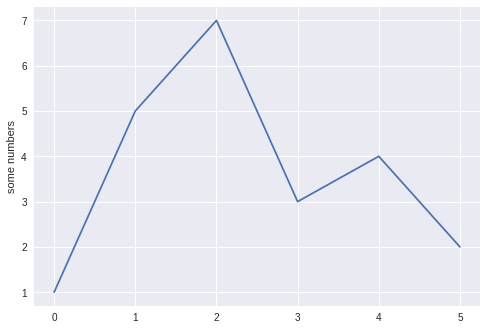

In [115]:
import matplotlib.pyplot as plt
plt.plot([1, 5, 7, 3, 4, 2])
plt.ylabel('some numbers')
plt.show()

The above code shows steps to create a plot:
1. import the pyplot module of matplotlib package. Globally people use plt alias and so do us!
2. use plot method and pass the data to plot
3. set plot attributes like labels etc.
4. display or show the plot

Let us see how we can display a histogram. Note that histogram is plot of frequency distribution of your data, i.e. how many times each value appears in the data. Histogram is only for numerical data. If there are too many values, we can make is easy to see, by dividing our bar ranges in to bins. See example below where we divide the entire input range in 5 bins. Notice the use of **hist** function instead of plot.

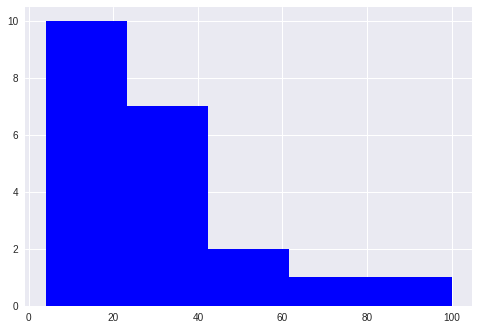

In [113]:
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
plt.hist(x, num_bins, facecolor='blue')
plt.show()

The histogram usually tells us the distribution of data. Why is it important? Letus take an example. Suppose you are a teacher in a university. After checking assignments for a week, you graded all the students. You gave these graded papers to a data entry guy in the university and tell him to create a spreadsheet containing the grades of all the students. But the guy only stores the grades and not the corresponding students.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/09/18144707/data.png)

He made another blunder, he missed a couple of entries in a hurry and we have no idea whose grades are missing. Let’s find a way to solve this.

One way is that you visualize the grades and see if you can find a trend in the data.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/09/18143526/image672.png)

The graph that you have plot is called the frequency distribution of the data. You see that there is a smooth curve like structure that defines our data, but do you notice an anomaly? We have an abnormally low frequency at a particular score range. So the best guess would be to have missing values that remove the dent in the distribution.

This is how you would try to solve a real-life problem using data analysis. For any Data Scientist, a student or a practitioner, distribution is a must know concept. It provides the basis for analytics and inferential statistics.

To know more about [probability, read here](https://www.analyticsvidhya.com/blog/2017/02/basic-probability-data-science-with-examples/); and to know more about [distributions, read here](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/) advanced content)

![alt text](https://image.slidesharecdn.com/seminarunivariate-140709142039-phpapp01/95/univariate-analysis-21-638.jpg)

The shape of the distribution can assist with identifying other descriptive statistics, such as which measure of central tendency is appropriate to use.

If the data are normally distributed, the mean, median and mode are all equal, and therefore are all appropriate measure of centre central tendency. 

If data are skewed, the median may be a more appropriate measure of central tendency.

Let us explore some more plots. Below generates a bar plot. We need to provide the categorical data and corresponding numerical values. the ypos gives the order in which we render those bars. align tells to center the bar for the label on x axis. alpha tells the transparency of the bar. Note the use of xticks to put the x labels and use of ylabel as well as title.

Bar chart is only used for categorical data.

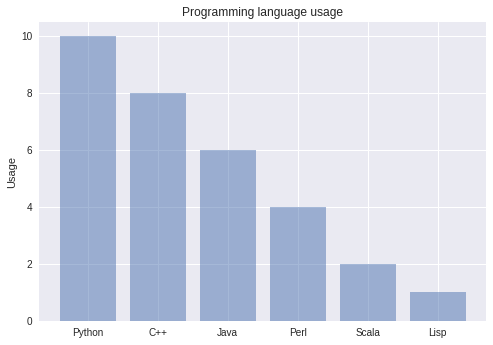

In [117]:
import numpy as np
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

Can you use barh method (to make horizontal bar chart) in code below? would you still use xticks and y label or change them?

You can also have multiple data series on same plot. Can you deduce what each line of code is doing below?

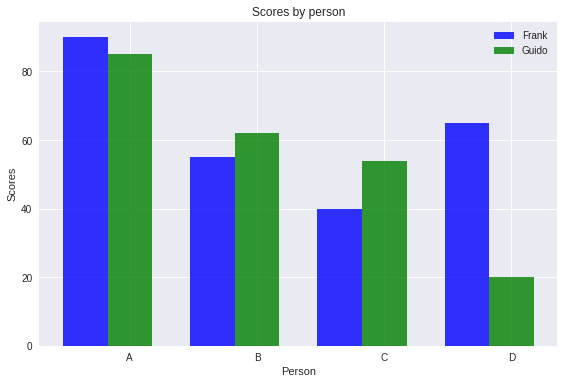

In [118]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

You can learn more of data visualization from [Datacamp's intro to data visualization with Python](https://www.datacamp.com/courses/introduction-to-data-visualization-with-python) course.

Do complete the quiz on vishnulearning.in after reading this content! All the best.

MLCC Bhimavaram Team

# References



1.   [NumPy and Pandas Tutorial – Data Analysis with Python](https://cloudxlab.com/blog/numpy-pandas-introduction/)
2.   [VECTORIZATION AND PARALLELIZATION IN PYTHON WITH NUMPY AND PANDAS](https://datascience.blog.wzb.eu/2018/02/02/vectorization-and-parallelization-in-python-with-numpy-and-pandas/)
3.   [Further Mathematics](https://legac.com.au/blogs/further-mathematics-exam-revision/further-mathematics-unit-3-data-analysis-types-of-data)
4. [Pandas Tutorial: Importing Data with read_csv()](https://www.datacamp.com/community/tutorials/pandas-read-csv)
5. [Common Probability distributions every data science professional should know](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)
6. [Statistical Langiage - Measures of Shape](http://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+measures+of+shape)



